# House Price Prediction (Regression)

## Project Overview
This notebook builds an end-to-end **house price prediction** workflow using a structured tabular dataset.

**Goal:** predict `SalePrice` from property features (size, quality, location-related indicators, garage/basement attributes, etc.).

## Dataset
- **Input data:** `train.csv` (loaded from a public GitHub URL in this notebook).
- **Target:** `SalePrice`.

> Note: The notebook includes an example Windows local path for the dataset, but the actual load step uses the GitHub raw URL so it remains reproducible when shared on GitHub.

## What This Notebook Covers
1. Imports & setup
2. Data loading
3. Data understanding (shape, types, summary stats)
4. Data preparation
   - Type fixes for discrete numeric features
   - Missing-value handling (numeric + categorical)
5. Exploratory analysis
   - Target distribution
   - Discrete, continuous, and categorical feature analysis
6. Modeling
   - Baseline Linear Regression
   - Lasso-based feature selection + Linear Regression
   - KNN, Decision Tree, Random Forest
   - PCA + models on reduced features
7. Evaluation
   - MAE, MSE, RMSE, and $R^2$

## How to Run
- Open the notebook in Jupyter / VS Code.
- Ensure dependencies are installed: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`.
- Run cells top-to-bottom.

---

## Table of Contents
- [Imports & Setup](#imports--setup)
- [Load Dataset](#load-dataset)
- [Data Understanding](#data-understanding)
- [Data Preparation](#data-preparation)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
- [Preprocessing for Modeling](#preprocessing-for-modeling)
- [Modeling & Evaluation](#modeling--evaluation)
- [Conclusion](#conclusion)


## Imports & Setup
This section imports the Python libraries used for data handling, visualization, and modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

## Load Dataset
The dataset is loaded from a GitHub raw CSV URL so the notebook stays reproducible when published.

In [ ]:
# Optional (local path): if you download the CSV manually, set a local file path here.
# This notebook primarily uses the GitHub raw URL below for reproducibility on GitHub.
# file_path = r"path/to/train.csv"

In [ ]:
url = 'https://raw.githubusercontent.com/Bharadwaj-07/projects/main/train.csv'
data = pd.read_csv(url)


## Data Understanding
Quick checks to understand the dataset structure (preview rows, shape, data types, and basic statistics).

In [ ]:
data.head() # First 5 rows of the data set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape # Number of rows and columns

(1460, 81)

In [ ]:
data.dtypes # Data type of the columns

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
data.dtypes.value_counts()

,count
object,43
int64,35
float64,3


In [ ]:
data.describe() # Statistical summary of the each column

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

***Data Preparation***

In [ ]:
# from above we can say that we have 3 data types : float64, int64 ,object
# There are some columns with incorrect data types
# Some of the features has discrete values so it is better to convert them into object rather than using it as int
# for example, Overallcond column is the rating from 1 to 10 on the overall condition of the house
# It is like a categorical variable

In [ ]:

int_to_object = ["MSSubClass","OverallQual","OverallCond","GarageCars"]

for feature in int_to_object:
    data[feature] = data[feature].astype(object)

In [ ]:
# Dropping the ID column as it is not necessary

In [ ]:
data.drop(columns=["Id"],axis=1,inplace=True)

In [ ]:
# Checking for duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Above indicates there are no duplicates in the dataset

In [ ]:
# Checking for missing values

In [ ]:
data.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
data.isna().sum().sum()

7829

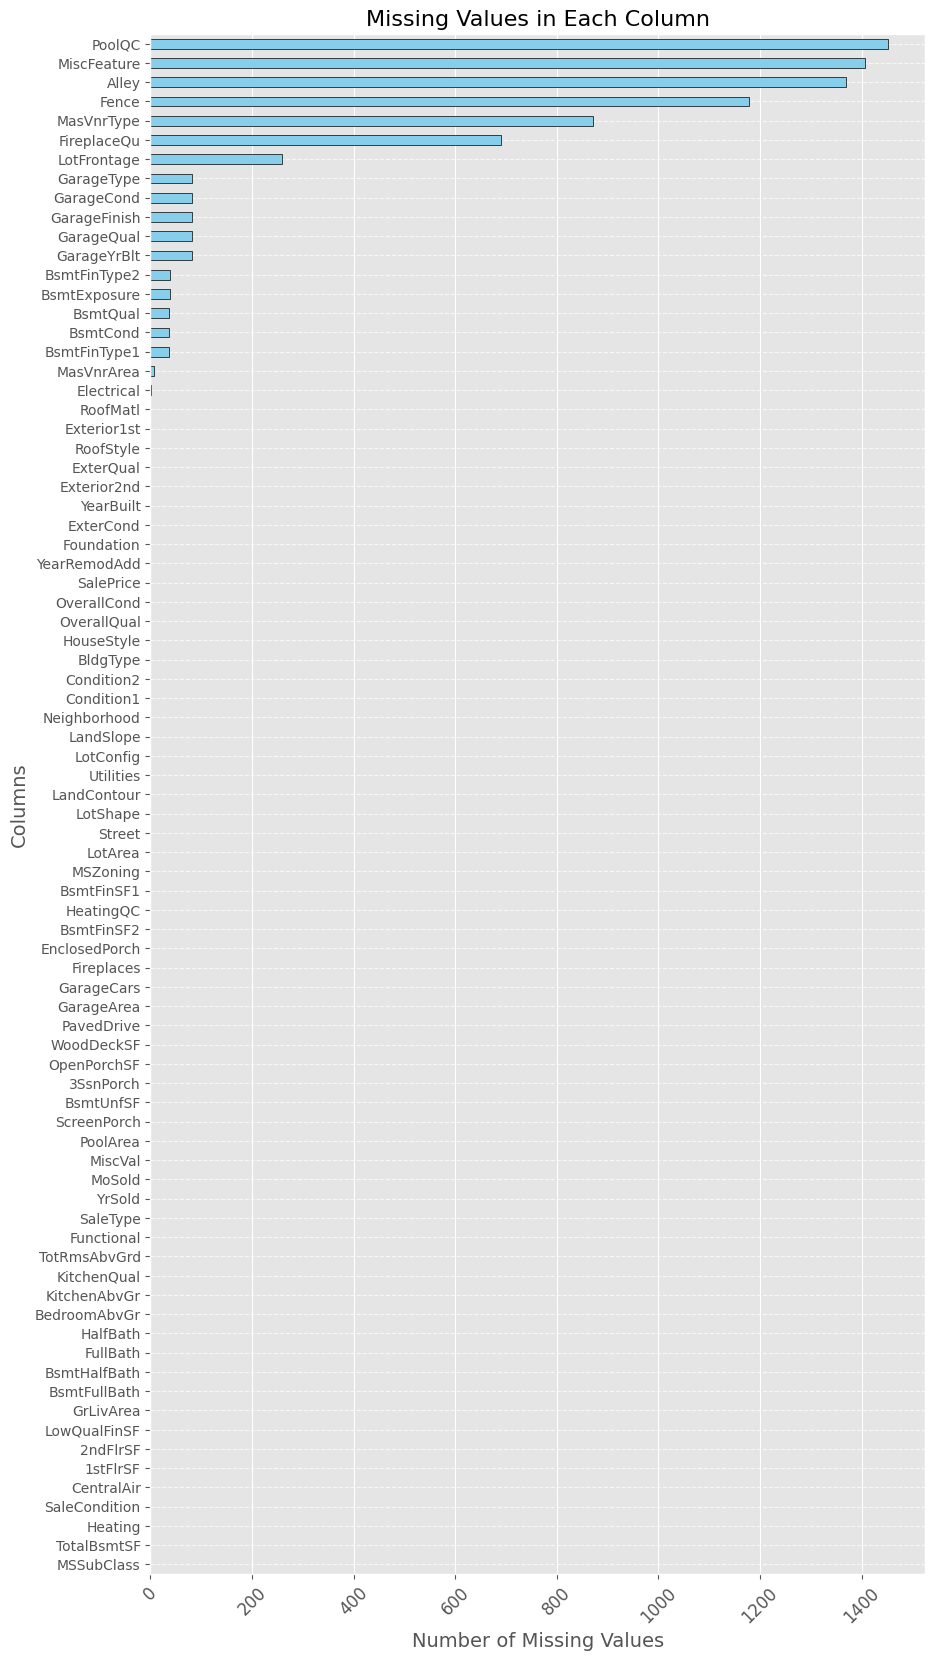

In [ ]:
missing_values = data.isna().sum()
missing_values = missing_values.sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 20))
missing_values.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Missing Values in Each Column', fontsize=16)
plt.xlabel('Number of Missing Values', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Filter to include only columns with missing values
missing_values = missing_values[missing_values > 0]
# sorting them in descending order
missing_values = missing_values.sort_values(ascending=False)

In [ ]:
missing_values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageFinish,81


***Handling Missing Values of Numeric data***

In [ ]:
# Out of all the feautures with missing values, there are only 3 features that are numeric and remaining are the categorical
# Numerical Features are LotFrontage, MasVnrArea,GarageYrBlt
# No need of dropping as we have less missing values, we can fill them
# If there are outliers in the columns then we fill with the median value of that column
# Else we fill using the mean value of that column

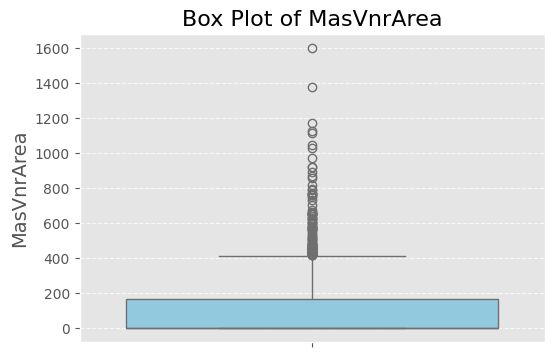

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['MasVnrArea'], color='skyblue')
plt.title('Box Plot of MasVnrArea', fontsize=16)
plt.ylabel('MasVnrArea', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# The above plot shows that there are outliers in that column so it is better to use the median value to fill
data["MasVnrArea"]=data["MasVnrArea"].fillna(data["MasVnrArea"].median())

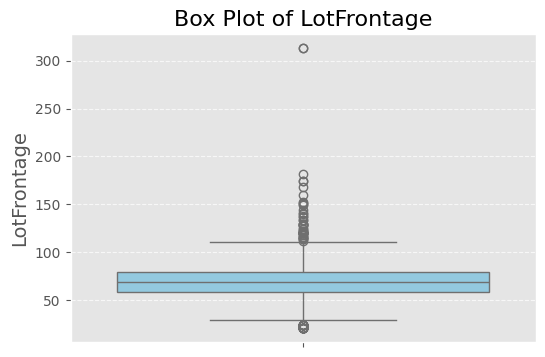

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['LotFrontage'], color='skyblue')
plt.title('Box Plot of LotFrontage', fontsize=16)
plt.ylabel('LotFrontage', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# The above plot shows that there are outliers in that column so it is better to use the median value to fill
data["LotFrontage"]=data["LotFrontage"].fillna(data["LotFrontage"].median())

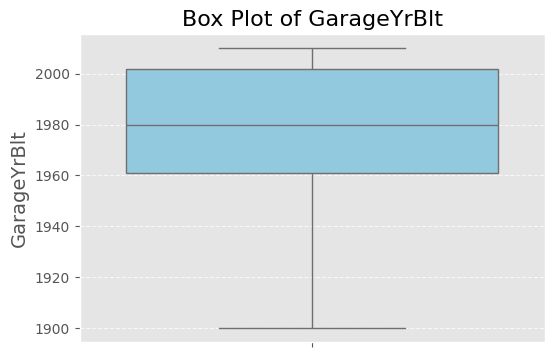

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['GarageYrBlt'], color='skyblue')
plt.title('Box Plot of GarageYrBlt', fontsize=16)
plt.ylabel('GarageYrBlt', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# The above plot shows that there are no outliers in that column so it is better to use the mean value to fill
data["GarageYrBlt"]=data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean())

In [ ]:
data[["GarageYrBlt","MasVnrArea","LotFrontage"]].isna().sum()

,0
GarageYrBlt,0
MasVnrArea,0
LotFrontage,0


***Handling Missing Values in Categorical Data***

In [ ]:
# Some categorical columns have many missing values and it is better to drop them than filling them

In [ ]:
data.drop(columns=["PoolQC","Fence","Alley","MiscFeature"],axis=1,inplace=True)

In [ ]:
# now we will look at the remaining columns one by one
# we will start with the column FireplaceQu

In [ ]:
data['FireplaceQu'].value_counts()

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [ ]:
data[data['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [ ]:
# It indicates that the missing values in the FireplaceQu are because there are no file places in that house
#  we will fill the missing values with NotAvailable

In [ ]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('NotAvailable')

In [ ]:
# Now we will look into the column MasVnrType

In [ ]:
data["MasVnrType"].value_counts()

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In [ ]:
data[data['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [ ]:
# It indicates that those rows that values are missing , they have zero area in the MasVnrArea
# so we can fill the missing values with none
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [ ]:
# Now we will look into the columns related to the basement
data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2']].isna().sum()

,0
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38


In [ ]:
data[data['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                        'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [ ]:
# From the above it is seen that the missing values would be because there is no basement at all in the house
# we will fill the missing values with No Basement value

In [ ]:
columns_to_fill = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in columns_to_fill:
    data[col] = data[col].fillna('No Basement')


In [ ]:
# Now we will look into the column Electrical

In [ ]:
data["Electrical"].isna().sum()

1

In [ ]:
data["Electrical"].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
# There is only one missing value and we will fill it using the mode of the column
data["Electrical"] = data["Electrical"].fillna(data["Electrical"].mode()[0])

In [ ]:
# Now we will look into the columns related to the Garage

In [ ]:
data[['GarageType','GarageFinish','GarageQual','GarageCond']].isna().sum()

,0
GarageType,81
GarageFinish,81
GarageQual,81
GarageCond,81


In [ ]:
data[data['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,1978.506164,NaN,0,0,NaN,NaN
48,NaN,1978.506164,NaN,0,0,NaN,NaN
78,NaN,1978.506164,NaN,0,0,NaN,NaN
88,NaN,1978.506164,NaN,0,0,NaN,NaN
89,NaN,1978.506164,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,1978.506164,NaN,0,0,NaN,NaN
1407,NaN,1978.506164,NaN,0,0,NaN,NaN
1449,NaN,1978.506164,NaN,0,0,NaN,NaN
1450,NaN,1978.506164,NaN,0,0,NaN,NaN


In [ ]:
data[['GarageType','GarageFinish','GarageQual','GarageCond']].mode()

,GarageType,GarageFinish,GarageQual,GarageCond
0,Attchd,Unf,TA,TA


In [ ]:
# There are 81 missing values in each of the four columns.
# The missing data may be as no data is available for the garage.
# We can't fill these too with their mode values as we do not have any idea abvout the garage.
# We'll simply fill them with No Garage

In [ ]:
columns_to_fill = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col in columns_to_fill:
    data[col] = data[col].fillna('No Garage')

In [ ]:
data.isna().sum().sum()

0

In [ ]:
# We have no null values in the dataset

***Target Variable***

In [ ]:
data["SalePrice"].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [ ]:
# Sale Price has a right skewed distribution.
# The median sale price of our dataset is 163000 which is less than the average value i.e because of right skewed distribution.
# We can see some of the houses have sale price more than 4,00,000.

***Discrete Numerical Analysis***

<ipython-input-70-1c37af43b9e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x="TotRmsAbvGrd", y="SalePrice", palette='hot',errorbar=None)


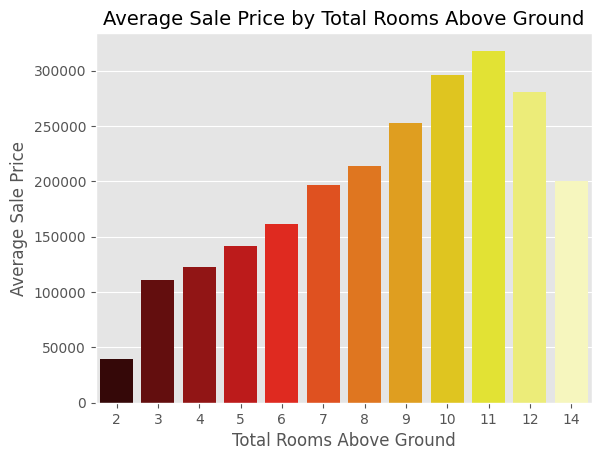

In [ ]:
sns.barplot(data, x="TotRmsAbvGrd", y="SalePrice", palette='hot',errorbar=None)

# Add labels and title
plt.xlabel("Total Rooms Above Ground", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Average Sale Price by Total Rooms Above Ground", fontsize=14)

# Show the plot
plt.show()

In [ ]:
# As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.

<ipython-input-72-008a0627cf4e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x="KitchenAbvGr", y="SalePrice", palette='hot',errorbar=None)


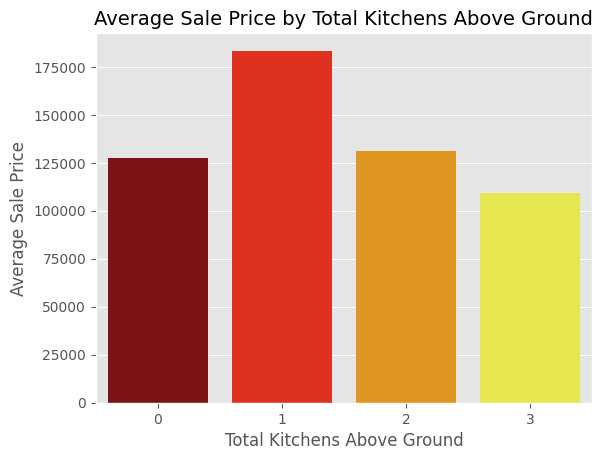

In [ ]:
sns.barplot(data, x="KitchenAbvGr", y="SalePrice", palette='hot',errorbar=None)

# Add labels and title
plt.xlabel("Total Kitchens Above Ground", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Average Sale Price by Total Kitchens Above Ground", fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Here as the number increases , price decreases.
# Price is highest for only one kitchent that is enough.
# No one demands for more than one kitchen.

<ipython-input-74-b4f4851ab4ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x="Fireplaces", y="SalePrice", palette='hot',errorbar=None)


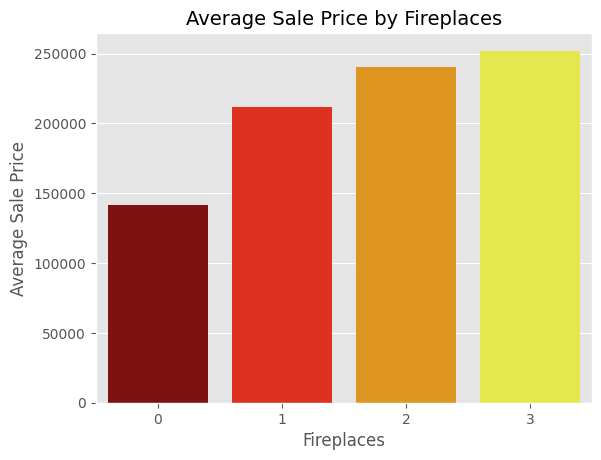

In [ ]:
sns.barplot(data, x="Fireplaces", y="SalePrice", palette='hot',errorbar=None)

# Add labels and title
plt.xlabel("Fireplaces", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Average Sale Price by Fireplaces", fontsize=14)

# Show the plot
plt.show()

In [ ]:
# As fireplaces will increase in the house , sale price will also increase.

***Continous Numerical Analysis***

In [ ]:
data_sub = data[['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                  'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']]

In [ ]:
data_sub_corr = data_sub.corr()
data_sub_corr

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
LotArea,1.000000,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.038068,0.263843
BsmtFinSF1,0.214103,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.003571,0.386420
BsmtFinSF2,0.111170,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.004940,-0.011378
BsmtUnfSF,-0.002618,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.023837,0.214479
TotalBsmtSF,0.260833,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,-0.018479,0.613581
1stFlrSF,0.299475,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,-0.021096,0.605852
2ndFlrSF,0.050986,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.016197,0.319334
LowQualFinSF,0.004779,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,-0.003793,-0.025606
GrLivArea,0.263116,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,-0.002416,0.708624
GarageArea,0.180403,0.296970,-0.018227,0.183303,0.486665,0.489782,0.138347,-0.067601,0.468997,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,-0.027400,0.623431


<Axes: >

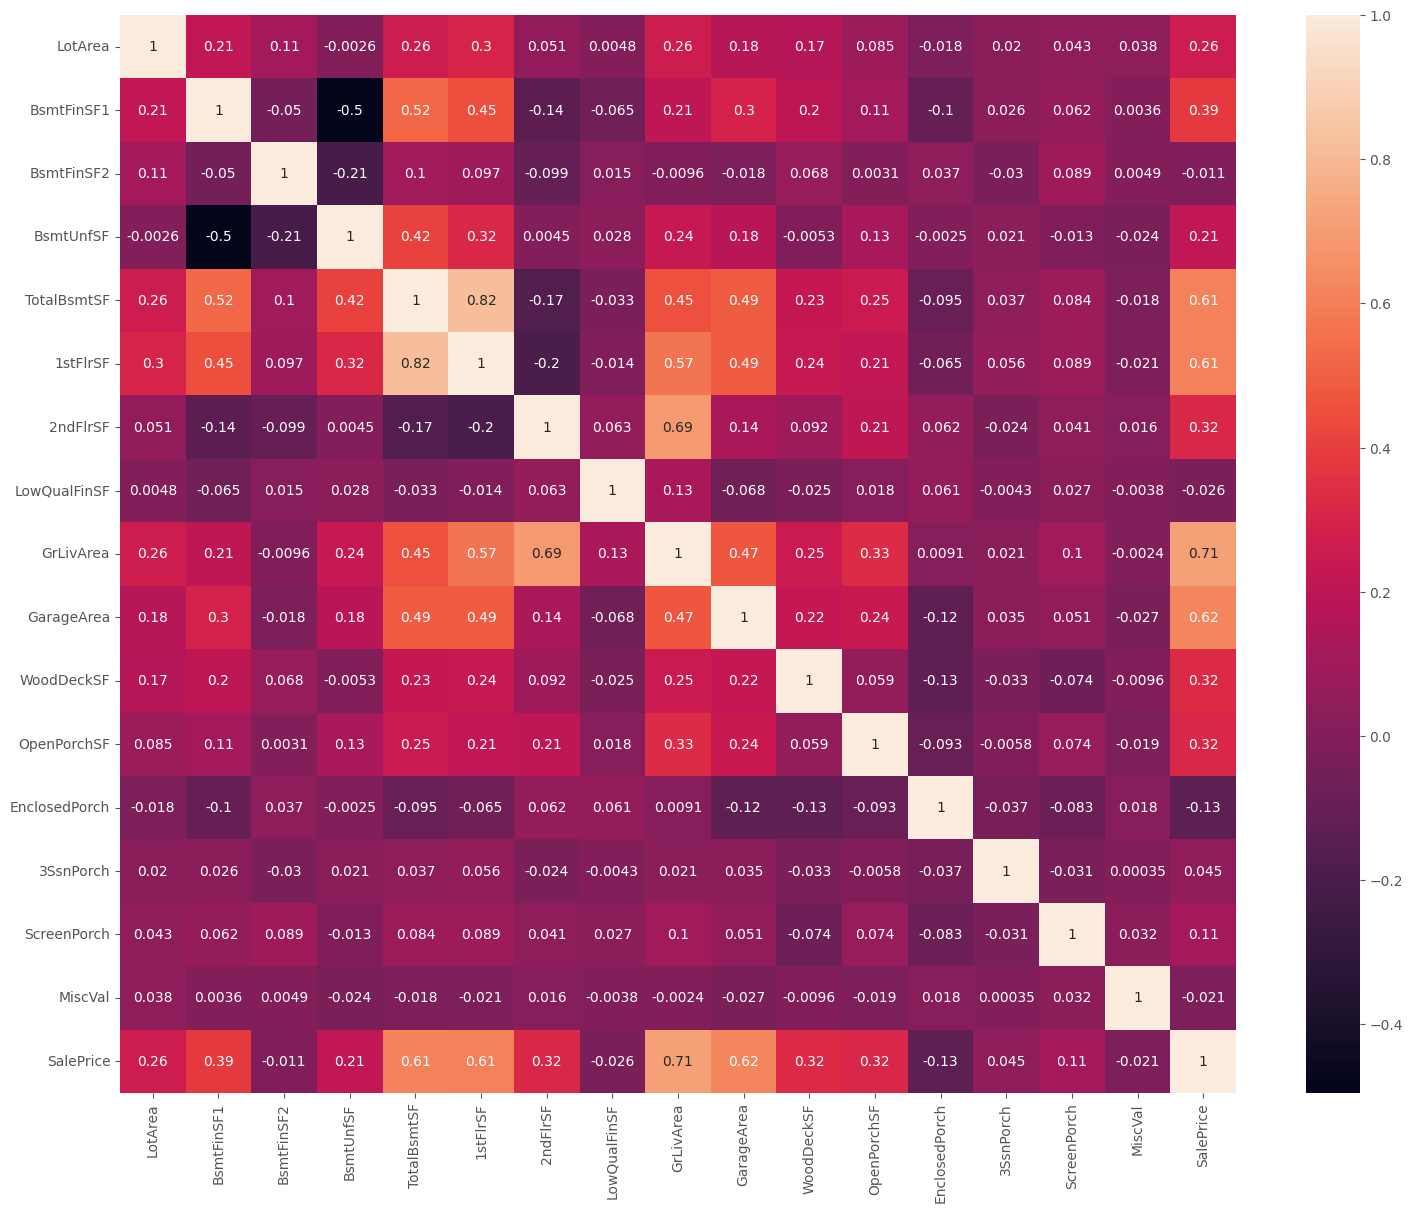

In [ ]:
plt.figure(figsize=(18,14))  # Adjust the figure size to make the heatmap clearer
sns.heatmap(data_sub_corr,annot = True)


In [ ]:
# Above Ground Living Area sq ft has a high positive correlation of 0.71 with the sale price
# Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with the Sale Price
# Garage Area has a positive correlation of 0.62 with Sale Price

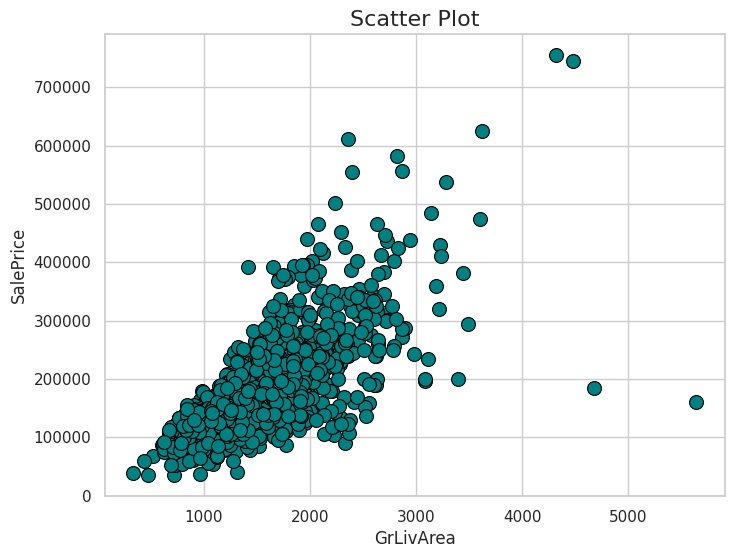

In [ ]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["GrLivArea"], y=data["SalePrice"], color='teal', s=100, edgecolor='black', marker='o')

# Customize the plot with title, labels, and grid
plt.title('Scatter Plot', fontsize=16)
plt.xlabel('GrLivArea', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)

# Show gridlines and plot
plt.grid(True)
plt.show()

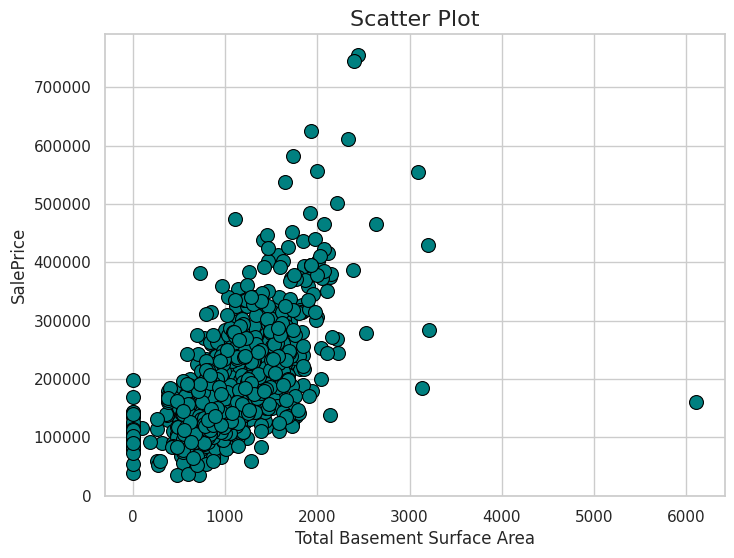

In [ ]:
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["TotalBsmtSF"], y=data["SalePrice"], color='teal', s=100, edgecolor='black', marker='o')

# Customize the plot with title, labels, and grid
plt.title('Scatter Plot', fontsize=16)
plt.xlabel('Total Basement Surface Area', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)

# Show gridlines and plot
plt.grid(True)
plt.show()

In [ ]:
# The Scatterplot shows us the extent of correlation of the above positive correlated features from the heatmap.
# We can see that as the features on xaxis increases , Sale Price also increases.This shows the positive correlation between them

***Categorical Analysis***

<ipython-input-83-b496e21488c2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x="OverallQual", y="SalePrice", palette='hot',errorbar=None)


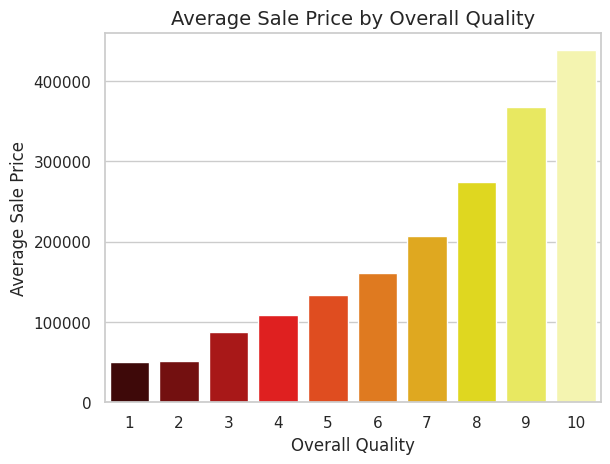

In [ ]:
sns.barplot(data, x="OverallQual", y="SalePrice", palette='hot',errorbar=None)

# Add labels and title
plt.xlabel("Overall Quality", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Average Sale Price by Overall Quality", fontsize=14)

# Show the plot
plt.show()

<ipython-input-84-c306925260ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x="MSZoning", y="SalePrice", palette='hot',errorbar=None)


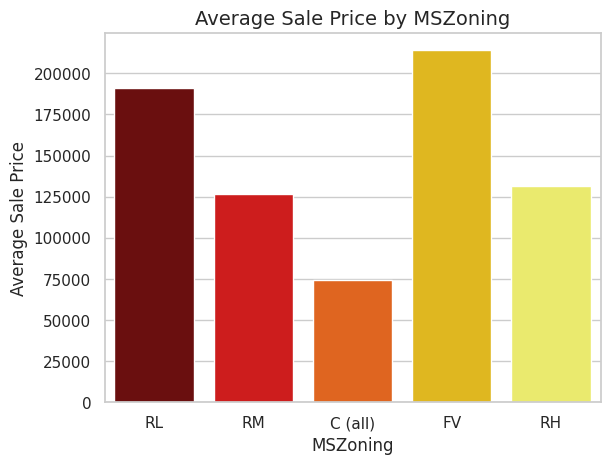

In [ ]:
sns.barplot(data, x="MSZoning", y="SalePrice", palette='hot',errorbar=None)

# Add labels and title
plt.xlabel("MSZoning", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Average Sale Price by MSZoning", fontsize=14)

# Show the plot
plt.show()

In [ ]:
data.shape

(1460, 76)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

***Encoding the Categorical Variables***

In [ ]:
# It is important to convert the categorical text data into model-understandable numerical data

In [ ]:
encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool']).columns
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,6,4,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,0,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,5,7,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,5,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,6,4,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,6,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,6,4,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,7,4,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,3,0,4,0,8,2,2,0,5,5,4,1999,2000,1,1,12,13,2,0.0,3,4,2,2,4,3,6,0,6,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,0,8,2007,8,4,175000
1456,0,3,85.0,13175,1,3,3,0,4,0,14,2,2,0,2,5,5,1978,1988,1,1,9,10,3,119.0,3,4,1,2,4,3,0,790,5,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,0,2,2010,8,4,210000
1457,6,3,66.0,9042,1,3,3,0,4,0,6,2,2,0,5,6,8,1941,2006,1,1,5,5,2,0.0,0,2,4,4,1,3,2,275,6,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,2500,5,2010,8,4,266500
1458,0,3,68.0,9717,1,3,3,0,4,0,12,2,2,0,2,4,5,1950,1996,3,1,8,8,2,0.0,3,4,1,4,4,2,2,49,5,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,0,4,2010,8,4,142125


***Feature Scaling***

In [ ]:
# It is important to scale all the features so that each feature contributes approximately proportionately to the final Sale Price.
# First remove the Target variable and apply the Scaling

In [ ]:
y=data['SalePrice']
X=data.drop(columns=['SalePrice'],axis=1)

columns_x=X.columns

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=[columns_x])

***Train and Test Data Split***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

***Linear Regression with all the Features***

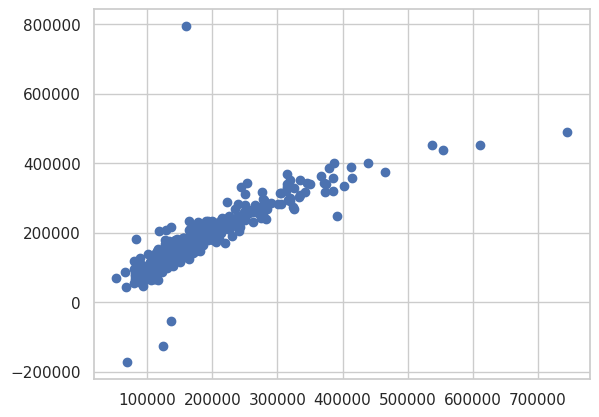

MAE: 22223.54680663579
MSE: 2154482754.835024
RMSE: 46416.40609563631
R2: 0.6826505419000215


In [ ]:
lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test)

#Scatterplot
plt.scatter(y_test, lm_predictions)
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print('R2:', metrics.r2_score(y_test, lm_predictions))


***Selecting Features using Lasso Regression***

In [ ]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Identify non-zero coefficients (selected features)
selected_features = X.columns[coefficients != 0]

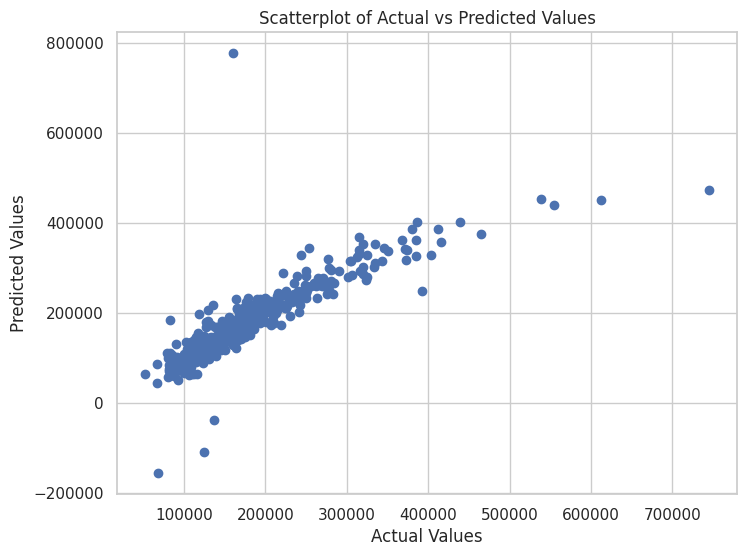

MAE: 21970.11495165474
MSE: 2057497516.6174924
RMSE: 45359.64634581593
R2: 0.6969362040725124


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train_selected,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test_selected)

#Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Actual vs Predicted Values')
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print('R2:', metrics.r2_score(y_test, lm_predictions))


In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)  # Use 3 neighbors

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 27641.630898021307
MSE: 1794643934.5832064
RMSE: 42363.23800871702
R2: 0.7356538227821625


In [ ]:
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))






MAE: 25994.61415525114
MSE: 1580211389.7420092
RMSE: 39751.872782826336
R2: 0.767239154227326


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)


print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))



MAE: 17112.85283105023
MSE: 924383932.8565274
RMSE: 30403.6828831069
R2: 0.8638407573650739


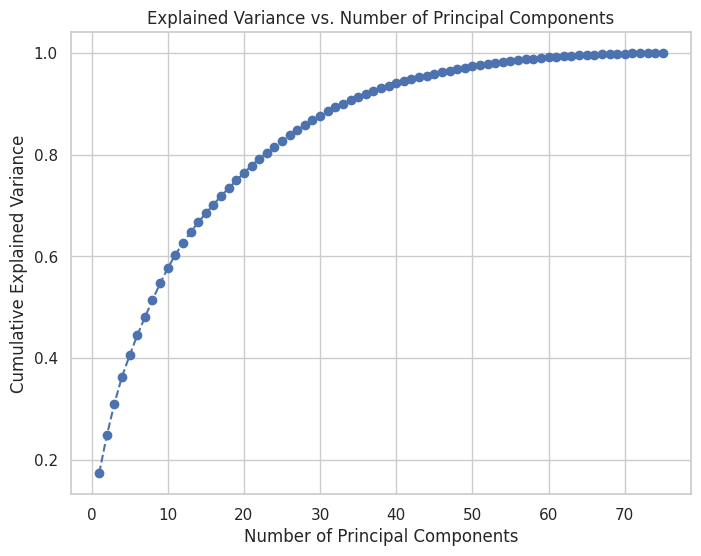

Optimal number of components to retain 95% variance: 43


In [ ]:

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Determine the optimal number of components (e.g., 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

In [ ]:
pca = PCA(n_components=43)
X_pca = pca.fit_transform(X)

# Create DataFrame with PCA results
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(43)])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

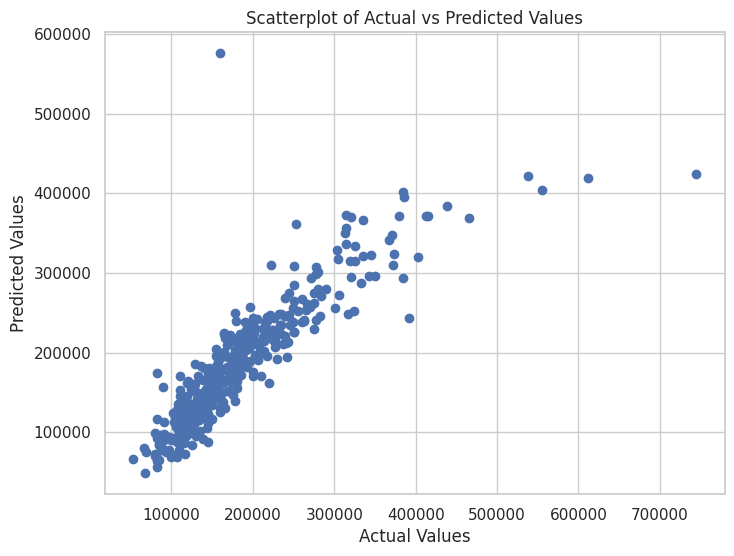

MAE: 23224.237143892246
MSE: 1551622033.4752226
RMSE: 39390.6338293156
R2: 0.7714502887552451


In [ ]:
lm = LinearRegression()

#Fitting linear model on train dataset
lm.fit(X_train_pca,y_train)

#Test dataset prediction
lm_predictions = lm.predict(X_test_pca)

#Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Actual vs Predicted Values')
plt.show()

#Evaluation
print("MAE:", metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))
print('R2:', metrics.r2_score(y_test, lm_predictions))


In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train_pca, y_train)

# Make predictions
y_pred = rf.predict(X_test_pca)


print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 23317.901666666665
MSE: 1404099585.2119207
RMSE: 37471.316833171484
R2: 0.7931799447057871
